In [ ]:
pip install lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.3 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split

In [ ]:
  df = pd.read_csv('data.csv')

In [ ]:
df

,Area,Sensing Range,Transmission Range,Number of Sensor nodes,Number of Barriers
0,5000,15,30,100,30
1,5000,16,32,112,35
2,5000,17,34,124,42
3,5000,18,36,136,48
4,5000,19,38,148,56
...,...,...,...,...,...
177,50000,36,72,352,101
178,50000,37,74,364,107
179,50000,38,76,376,114
180,50000,39,78,388,121


In [ ]:
df.shape

(182, 5)

In [ ]:
print(df.describe())

               Area  Sensing Range  Transmission Range  \
count    182.000000      182.00000          182.000000   
mean   24375.000000       27.50000           55.000000   
std    15197.252769        7.52069           15.041379   
min     5000.000000       15.00000           30.000000   
25%     9375.000000       21.00000           42.000000   
50%    21875.000000       27.50000           55.000000   
75%    39375.000000       34.00000           68.000000   
max    50000.000000       40.00000           80.000000   

       Number of Sensor nodes  Number of Barriers  
count              182.000000          182.000000  
mean               250.000000           93.005495  
std                 90.248276           65.453328  
min                100.000000           12.000000  
25%                172.000000           41.250000  
50%                250.000000           75.500000  
75%                328.000000          128.750000  
max                400.000000          320.000000  


In [ ]:
target=df["Number of Barriers"]

In [ ]:
target.head()

0    30
1    35
2    42
3    48
4    56
Name: Number of Barriers, dtype: int64

In [ ]:
data=df.loc[:, ["Area","Sensing Range", "Transmission Range", "Number of Sensor nodes"]]

In [ ]:
data.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes
0,5000,15,30,100
1,5000,16,32,112
2,5000,17,34,124
3,5000,18,36,136
4,5000,19,38,148


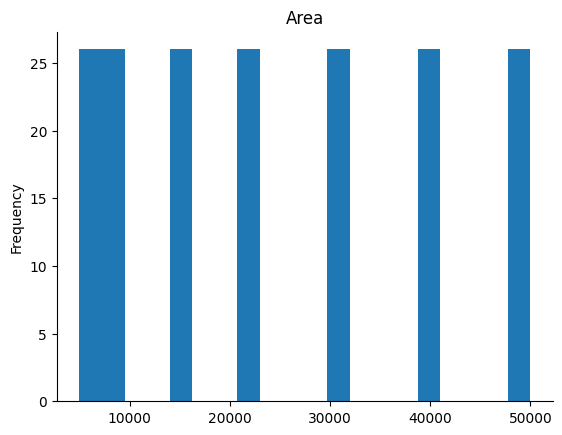

In [ ]:
from matplotlib import pyplot as plt
df['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

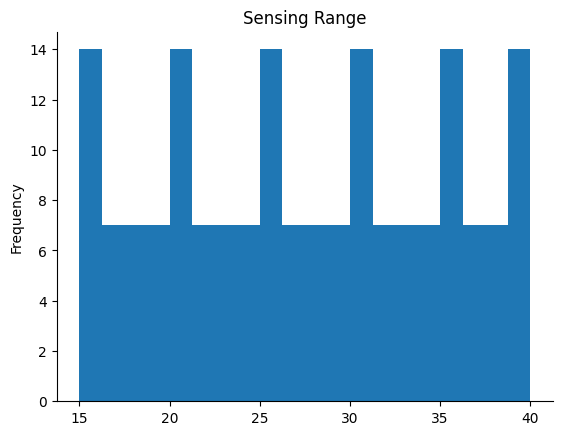

In [ ]:
from matplotlib import pyplot as plt
df['Sensing Range'].plot(kind='hist', bins=20, title='Sensing Range')
plt.gca().spines[['top', 'right',]].set_visible(False)

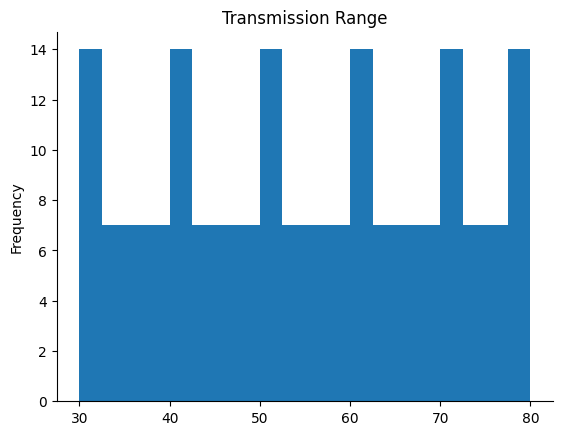

In [ ]:
from matplotlib import pyplot as plt
df['Transmission Range'].plot(kind='hist', bins=20, title='Transmission Range')
plt.gca().spines[['top', 'right',]].set_visible(False)

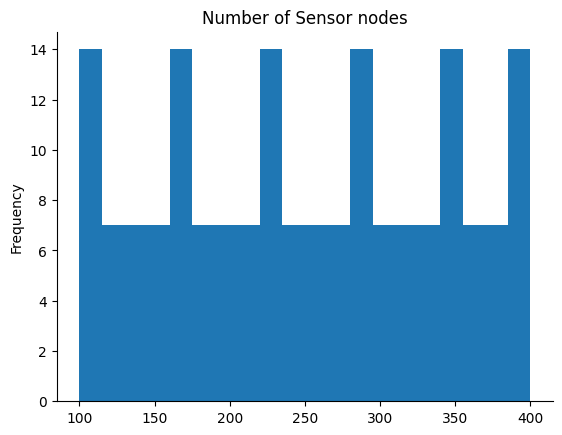

In [ ]:
from matplotlib import pyplot as plt
df['Number of Sensor nodes'].plot(kind='hist', bins=20, title='Number of Sensor nodes')
plt.gca().spines[['top', 'right',]].set_visible(False)

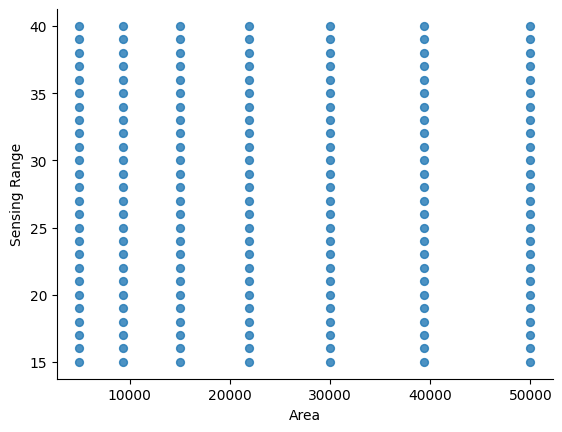

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Area', y='Sensing Range', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

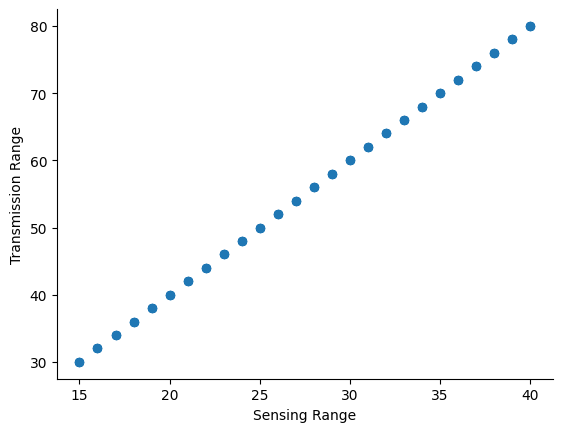

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Sensing Range', y='Transmission Range', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

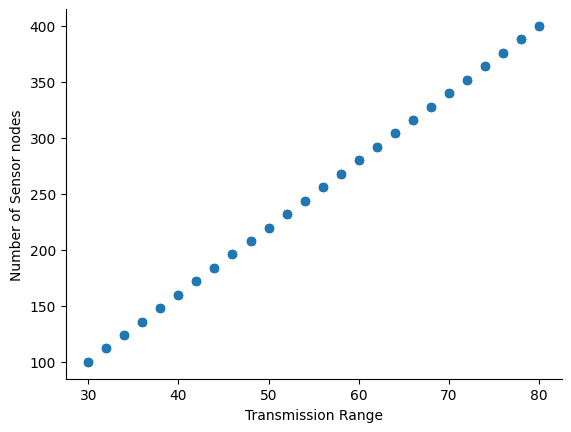

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Transmission Range', y='Number of Sensor nodes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

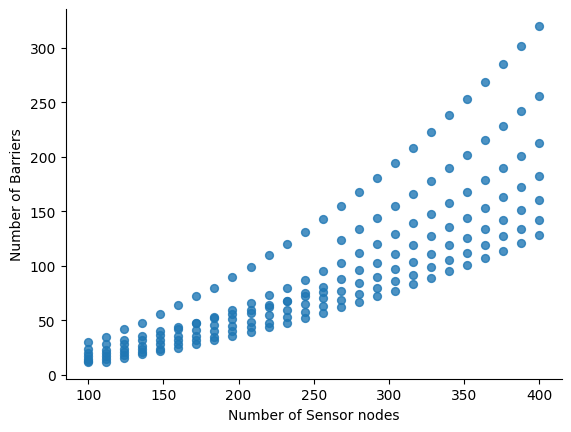

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Number of Sensor nodes', y='Number of Barriers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

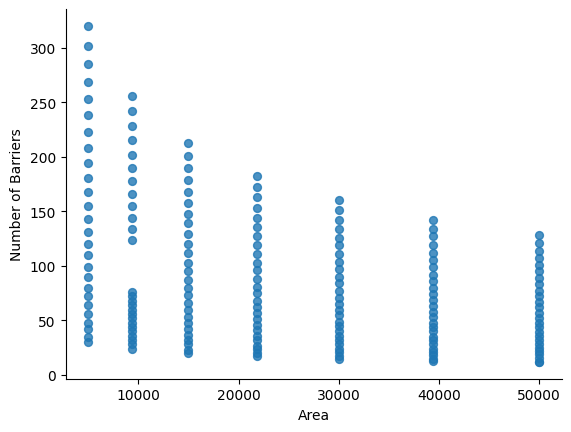

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Area', y='Number of Barriers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

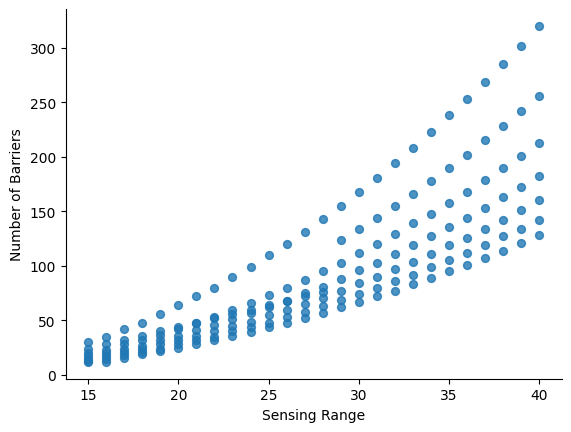

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Sensing Range', y='Number of Barriers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

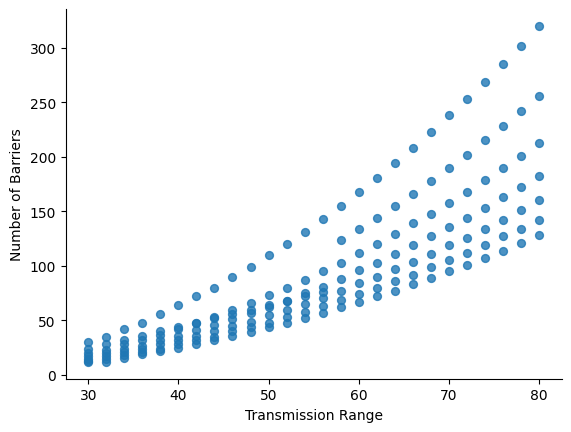

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Transmission Range', y='Number of Barriers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X=df.drop('Number of Barriers',axis=1)
y=df["Number of Barriers"]

In [ ]:
target=df["Number of Barriers"]

In [ ]:
X.head()

,Area,Sensing Range,Transmission Range,Number of Sensor nodes
0,5000,15,30,100
1,5000,16,32,112
2,5000,17,34,124
3,5000,18,36,136
4,5000,19,38,148


In [ ]:
y.head()

0    30
1    35
2    42
3    48
4    56
Name: Number of Barriers, dtype: int64

In [ ]:
np.random.seed(80)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(random_state=80)
rf_regressor.fit(X, y)
feature_importances = rf_regressor.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
Area: 0.2439963299722894
Sensing Range: 0.2769905708609896
Transmission Range: 0.19841389548263086
Number of Sensor nodes: 0.28059920368409025


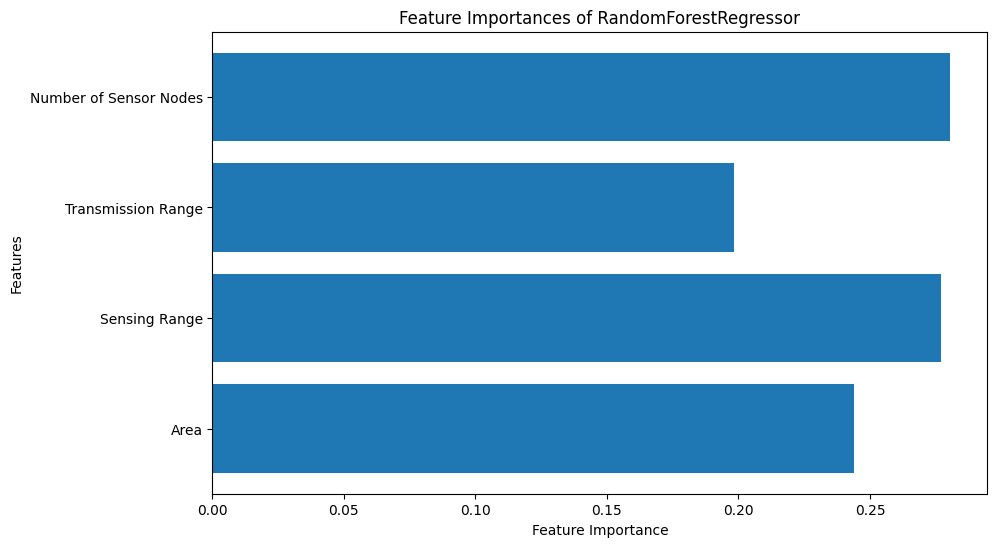

In [ ]:
import matplotlib.pyplot as plt

# Define the names of the features
feature_names = ['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor Nodes']

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances of RandomForestRegressor')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler for central mean scaling
scaler = StandardScaler(with_mean=True, with_std=False)

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (using the parameters learned from training data)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

# Define the Linear Regression model
linear_reg = LinearRegression()

# Train the model
start_time = time.time()
linear_reg.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = linear_reg.predict(X_test_scaled)

# Calculate evaluation metrics
r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("Linear Regression Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)


Linear Regression Evaluation Metrics:
R: 0.9196344877780309
RMSE: 25.618406946927625
Bias: -0.26471139675269695
Training Time (seconds): 0.03313875198364258


In [ ]:
adaboost_reg = AdaBoostRegressor()

# Train the model
start_time = time.time()
adaboost_reg.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = adaboost_reg.predict(X_test_scaled)

# Calculate evaluation metrics
r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("AdaBoost Regression Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)

AdaBoost Regression Evaluation Metrics:
R: 0.9514137779489464
RMSE: 20.083492503632254
Bias: 1.855165733171906
Training Time (seconds): 0.06872987747192383


In [ ]:
from lightgbm import LGBMRegressor
# Define the LightGBM Regressor model
lgbm_reg = LGBMRegressor()

# Train the model
start_time = time.time()
lgbm_reg.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = lgbm_reg.predict(X_test_scaled)

# Calculate evaluation metrics
r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("LightGBM Regressor Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 4
[LightGBM] [Info] Start training from score 89.020690
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [ ]:
catboost_reg = CatBoostRegressor()

# Train the model
start_time = time.time()
catboost_reg.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = catboost_reg.predict(X_test_scaled)

# Calculate evaluation metrics
r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("\nCatBoost Regressor Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)

Learning rate set to 0.030177
0:	learn: 63.3496586	total: 46.1ms	remaining: 46.1s
1:	learn: 62.0935907	total: 46.5ms	remaining: 23.2s
2:	learn: 60.9565591	total: 46.6ms	remaining: 15.5s
3:	learn: 59.8328970	total: 46.9ms	remaining: 11.7s
4:	learn: 58.6693449	total: 47.1ms	remaining: 9.38s
5:	learn: 57.3793299	total: 47.4ms	remaining: 7.85s
6:	learn: 56.3443063	total: 47.6ms	remaining: 6.76s
7:	learn: 55.1582168	total: 47.9ms	remaining: 5.94s
8:	learn: 54.1606397	total: 48.1ms	remaining: 5.29s
9:	learn: 53.1090212	total: 48.3ms	remaining: 4.78s
10:	learn: 52.0818787	total: 48.6ms	remaining: 4.37s
11:	learn: 51.1504551	total: 48.8ms	remaining: 4.02s
12:	learn: 50.0439328	total: 49ms	remaining: 3.72s
13:	learn: 48.9909616	total: 49.3ms	remaining: 3.47s
14:	learn: 47.9996899	total: 49.5ms	remaining: 3.25s
15:	learn: 47.0252122	total: 49.8ms	remaining: 3.06s
16:	learn: 46.1141750	total: 50ms	remaining: 2.89s
17:	learn: 45.2489925	total: 50.3ms	remaining: 2.74s
18:	learn: 44.3548134	total: 5

In [ ]:
import xgboost as xgb

# Define the XGBoost Regression model
xgboost_reg = xgb.XGBRegressor()

# Train the model
start_time = time.time()
xgboost_reg.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = xgboost_reg.predict(X_test_scaled)

# Calculate evaluation metrics
r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("XGBoost Regression Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)

XGBoost Regression Evaluation Metrics:
R: 0.9901781763233656
RMSE: 9.119059221415014
Bias: 0.794352505658124
Training Time (seconds): 0.0719304084777832


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost Regression model
xgboost_reg = xgb.XGBRegressor()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgboost_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Get the best model from grid search
best_xgboost_reg = grid_search.best_estimator_

# Predictions
y_pred = best_xgboost_reg.predict(X_test_scaled)

# Calculate evaluation metrics

r = np.sqrt(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)

print("XGBoost Regression Evaluation Metrics:")
print("R:", r)
print("RMSE:", rmse)
print("Bias:", bias)
print("Training Time (seconds):", training_time)
print("Best Parameters:", grid_search.best_params_)


XGBoost Regression Evaluation Metrics:
R: 0.9936523161681711
RMSE: 7.3373687214971675
Bias: -1.7735986451844912
Training Time (seconds): 157.96380877494812
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.7}


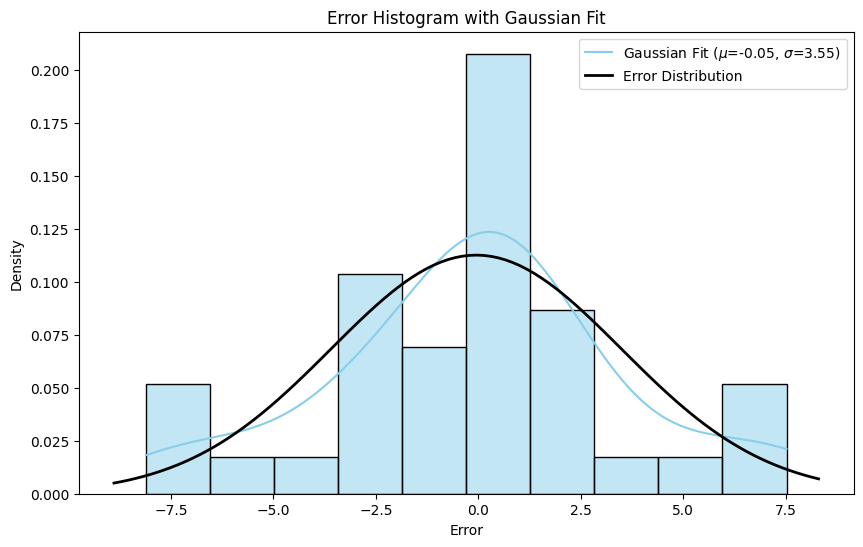

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Calculate the errors
errors = y_test - y_pred

# Plot the error histogram
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=10, kde=True, stat='density', color='skyblue')

# Fit a continuous Gaussian distribution to the error distribution
mu, std = norm.fit(errors)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Error')
plt.ylabel('Density')
plt.title('Error Histogram with Gaussian Fit')

# Add legend with Gaussian fit parameters
plt.legend(['Gaussian Fit ($\mu$={:.2f}, $\sigma$={:.2f})'.format(mu, std), 'Error Distribution'])

plt.show()
